# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [133]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [134]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        #sleep(5)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
   # print(city_url)
    #break

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a GET request to the OpenWeatherMap API
        response = requests.get(city_url)

        # If the response is successful (status code 200), parse the JSON and retrieve data
        #if response.status_code == 200:
        city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

            # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

       # else:
            #print(f"Error: {response.status_code} - {response.content}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {str(e)}")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | selkirk
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | port augusta
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | vingt cinq
City not found. Skipping... Error: 'coord'
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | mogocha
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | plettenberg bay
Processing Record 19 of Set 1 | kodinsk
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | puerto nat

Processing Record 37 of Set 4 | riohacha
Processing Record 38 of Set 4 | lorengau
Processing Record 39 of Set 4 | sinabang
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | port antonio
Processing Record 42 of Set 4 | shalqar
Processing Record 43 of Set 4 | lesosibirsk
Processing Record 44 of Set 4 | fokino
Processing Record 45 of Set 4 | belem de sao francisco
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | vilyuysk
Processing Record 48 of Set 4 | inirida
Processing Record 49 of Set 4 | maros
City not found. Skipping... Error: 'coord'
Processing Record 50 of Set 4 | praia da vitoria
Processing Record 1 of Set 5 | copala
Processing Record 2 of Set 5 | yumaguzino
Processing Record 3 of Set 5 | kisangani
Processing Record 4 of Set 5 | tolanaro
Processing Record 5 of Set 5 | genhe
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | buka
Processing Record 8 of Set 5 | nago
Processing Record 9 of Set 5 | yavatmal
Processing R

Processing Record 27 of Set 8 | tinogasta
Processing Record 28 of Set 8 | villa mercedes
Processing Record 29 of Set 8 | piti village
Processing Record 30 of Set 8 | san antonio de pale
Processing Record 31 of Set 8 | turbat
Processing Record 32 of Set 8 | puerto aysen
Processing Record 33 of Set 8 | sao geraldo do araguaia
Processing Record 34 of Set 8 | kiruna
Processing Record 35 of Set 8 | akureyri
Processing Record 36 of Set 8 | kualakapuas
Processing Record 37 of Set 8 | nazare da mata
Processing Record 38 of Set 8 | tralee
Processing Record 39 of Set 8 | ahau
City not found. Skipping... Error: 'coord'
Processing Record 40 of Set 8 | floro
Processing Record 41 of Set 8 | sarakhs
Processing Record 42 of Set 8 | igarka
Processing Record 43 of Set 8 | nishinoomote
Processing Record 44 of Set 8 | san julian
Processing Record 45 of Set 8 | carnarvon
Processing Record 46 of Set 8 | tateyama
Processing Record 47 of Set 8 | as sulayyil
Processing Record 48 of Set 8 | yamethin
Processing 

Processing Record 12 of Set 12 | cargados carajos
City not found. Skipping... Error: 'coord'
Processing Record 13 of Set 12 | arkhangel'sk
Processing Record 14 of Set 12 | saint-pierre
Processing Record 15 of Set 12 | gallivare
City not found. Skipping... Error: 'coord'
Processing Record 16 of Set 12 | cole harbour
Processing Record 17 of Set 12 | diego de almagro
Processing Record 18 of Set 12 | yingkou
Processing Record 19 of Set 12 | batu gajah
Processing Record 20 of Set 12 | huicungo
Processing Record 21 of Set 12 | san pedro pochutla
Processing Record 22 of Set 12 | golmarmara
Processing Record 23 of Set 12 | north side
Processing Record 24 of Set 12 | kashgar
Processing Record 25 of Set 12 | amahai
Processing Record 26 of Set 12 | gaozhou
Processing Record 27 of Set 12 | ballina
Processing Record 28 of Set 12 | lincolnton
Processing Record 29 of Set 12 | parvatipuram
Processing Record 30 of Set 12 | paka
Processing Record 31 of Set 12 | namibe
Processing Record 32 of Set 12 | bo

In [135]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [136]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,10.80,87,86,3.67,CL,1684988419
1,constantia,44.1833,28.6500,17.61,77,61,1.59,RO,1684988404
2,selkirk,50.1436,-96.8845,15.08,59,85,1.79,CA,1684988590
3,port-aux-francais,-49.3500,70.2167,5.73,99,100,8.57,TF,1684988592
4,ilulissat,69.2167,-51.1000,0.01,51,93,6.17,GL,1684988594


In [141]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [142]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,10.80,87,86,3.67,CL,1684988419
1,constantia,44.1833,28.6500,17.61,77,61,1.59,RO,1684988404
2,selkirk,50.1436,-96.8845,15.08,59,85,1.79,CA,1684988590
3,port-aux-francais,-49.3500,70.2167,5.73,99,100,8.57,TF,1684988592
4,ilulissat,69.2167,-51.1000,0.01,51,93,6.17,GL,1684988594


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

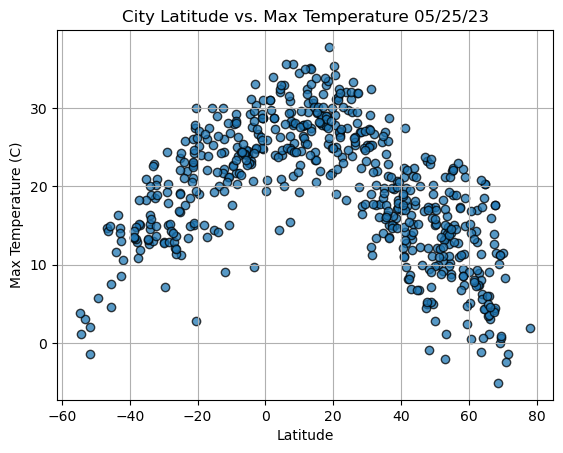

In [143]:
# Extract latitude and max temperature data from city_data
latitudes = [data["Lat"] for data in city_data]
max_temps = [data["Max Temp"] for data in city_data]

# Build scatter plot for latitude vs. temperature
plt.scatter(latitudes, max_temps, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig1.png")

# Show plot
plt.show() 

#### Latitude Vs. Humidity

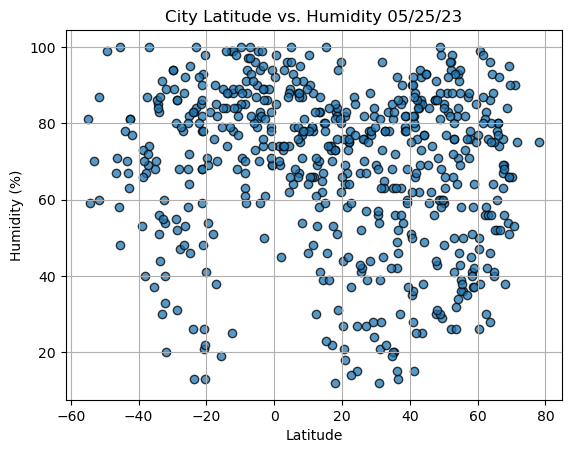

In [144]:
# Extract latitude and humidity data from city_data
latitudes = [data["Lat"] for data in city_data]
city_humidity = [data["Humidity"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_humidity, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

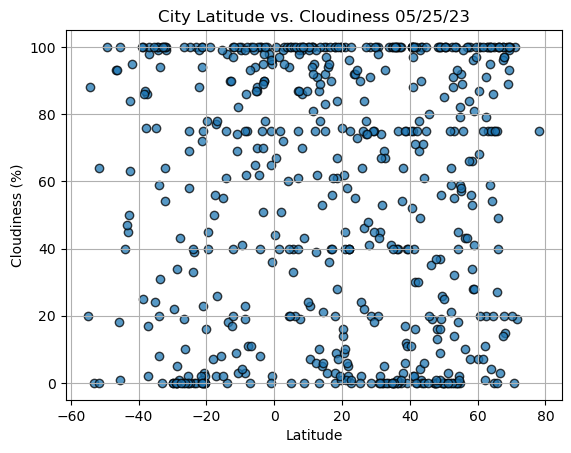

In [145]:
# Extract latitude and cloudiness data from city_data
latitudes = [data["Lat"] for data in city_data]
city_clouds = [data["Cloudiness"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_clouds, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

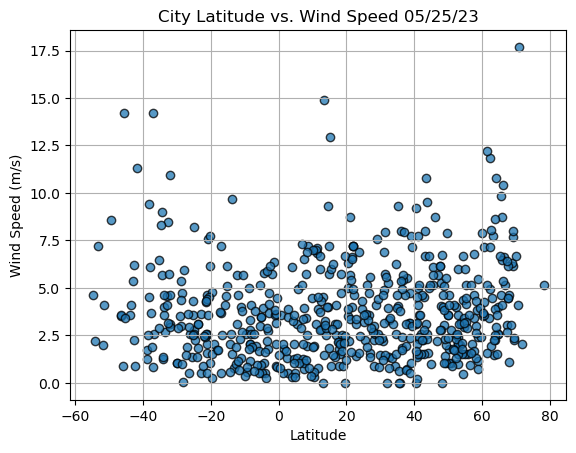

In [146]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [data["Lat"] for data in city_data]
city_wind = [data["Wind Speed"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_wind, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [147]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.text(0.05, 0.9, line_eq, fontsize=12, color="red", transform=plt.gca().transAxes)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [148]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,constantia,44.1833,28.6500,17.61,77,61,1.59,RO,1684988404
2,selkirk,50.1436,-96.8845,15.08,59,85,1.79,CA,1684988590
4,ilulissat,69.2167,-51.1000,0.01,51,93,6.17,GL,1684988594
6,yellowknife,62.4560,-114.3525,16.98,58,20,4.92,CA,1684988601
8,jamestown,42.0970,-79.2353,8.17,76,0,2.57,US,1684988609


In [149]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,10.80,87,86,3.67,CL,1684988419
3,port-aux-francais,-49.3500,70.2167,5.73,99,100,8.57,TF,1684988592
5,new norfolk,-42.7826,147.0587,14.72,63,50,2.24,AU,1684988596
7,port augusta,-32.5000,137.7667,18.52,60,100,8.47,AU,1684988603
9,blackmans bay,-43.0167,147.3167,14.07,67,45,5.37,AU,1684988621


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6291435206689979


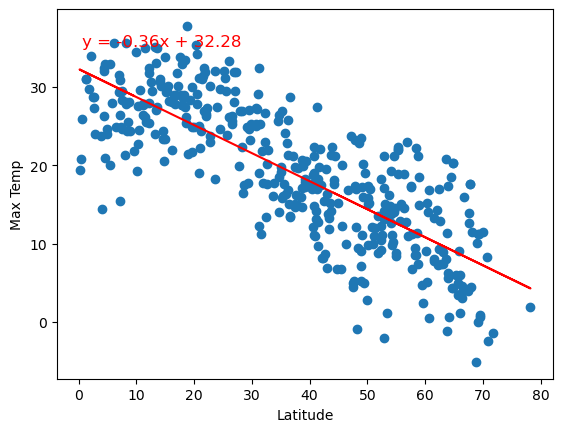

In [150]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(0,6))
slope = 2.5  # Defining the variable 'slope'
intercept = 0.5  # Defining the variable 'intercept'

#regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
#plt.show()

The r-value is: 0.5646833084396495


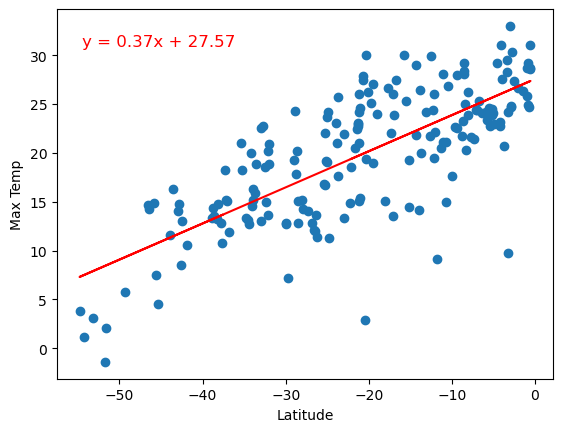

In [151]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,0))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.006505436112219862


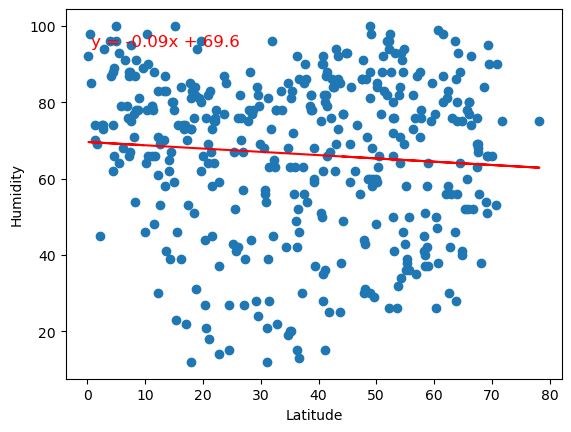

In [152]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,0))


#x_values = northern_hemi_df['Lat']
#y_values = northern_hemi_df['Humidity']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Latitude')
#plt.ylabel('Humidity')
#plt.show()

The r-value is: 0.05551017987468227


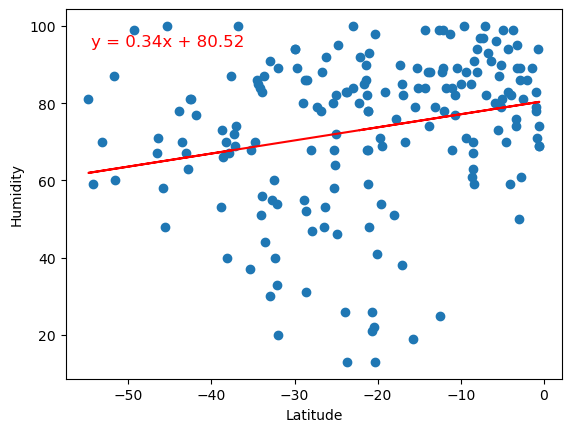

In [153]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,0))

**Discussion about the linear relationship:** 
Both r-values suggest a very weak or no linear correlation between humidity and latitude in the northern and southern hemisphere. This indicates that there is little to no relationship between these two variables based on the linear regression analysis. The scatter plot and regression line would likely show a random distribution of points without a clear trend.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0031131135108010584


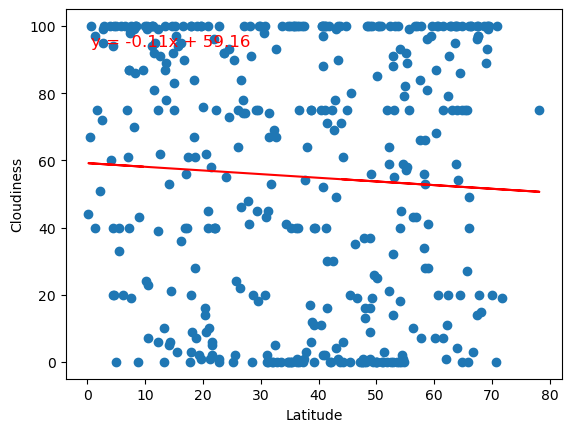

In [154]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,0))

The r-value is: 0.01495138986515667


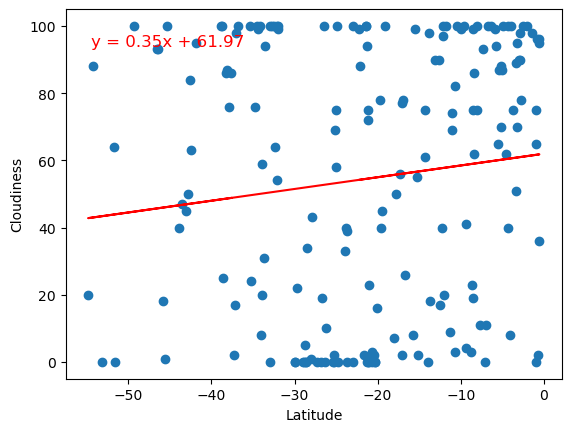

In [155]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,0))

**Discussion about the linear relationship:**  There is a very weak positive correlation between cloudiness and latitude in the northern and southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.026939371104365995


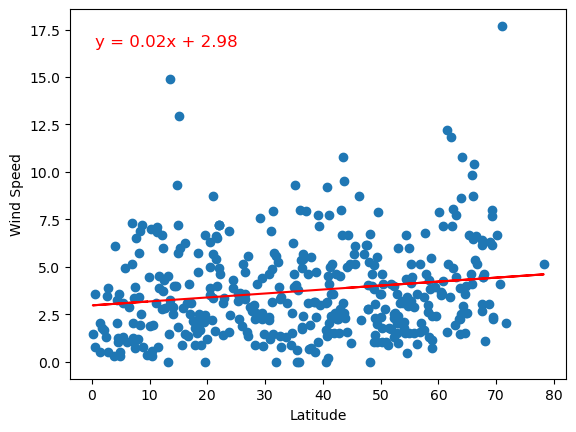

In [156]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,0))

The r-value is: 0.0693367270739167


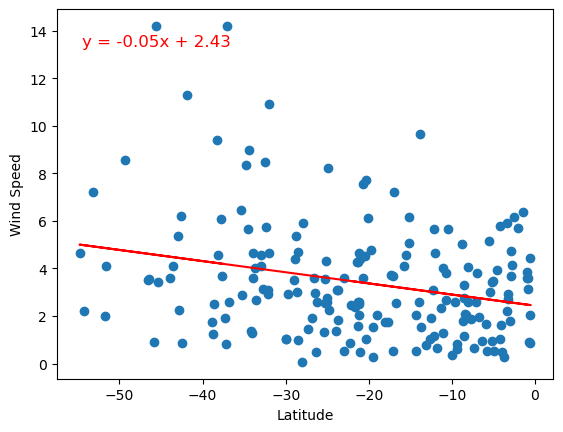

In [158]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,0))

**Discussion about the linear relationship:**  There is a very weak positive correlation between wind speed and latitude in the northern and southern  hemisphere. 
